In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('C:/Users/user/Documents/SEMESTER 5/MESIN 1 PAK TEGUH/Free uts/predic_tabel.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [9]:
df

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
29996,29997,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29997,29998,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak


In [10]:
df['Merokok'].value_counts()

Aktif    15210
Pasif    14790
Name: Merokok, dtype: int64

In [11]:
df['Aktivitas_Olahraga'].value_counts()

Jarang    17994
Sering    12006
Name: Aktivitas_Olahraga, dtype: int64

In [12]:
df['Usia'].value_counts()

Muda    15383
Tua     14617
Name: Usia, dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False)

No                    0
Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0
Hasil                 0
dtype: int64

In [14]:
df['Usia'] = np.where(df['Usia']=='Tua',1,0)
df['Jenis_Kelamin'] = np.where(df['Jenis_Kelamin']=='Pria',1,0)
df['Merokok'] = np.where(df['Merokok']=='Aktif',1,0)
df['Bekerja'] = np.where(df['Bekerja']=='Ya',1,0)
df['Rumah_Tangga'] = np.where(df['Rumah_Tangga']=='Ya',1,0)
df['Aktivitas_Begadang'] = np.where(df['Aktivitas_Begadang']=='Ya',1,0)
df['Aktivitas_Olahraga'] = np.where(df['Aktivitas_Olahraga']=='Sering',1,0)
df['Asuransi'] = np.where(df['Asuransi']=='Ada',1,0)
df['Penyakit_Bawaan'] = np.where(df['Penyakit_Bawaan']=='Ada',1,0)
df['Hasil'] = np.where(df['Hasil']=='Ya',1,0)

In [15]:
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,1,1,0,0,1,1,1,1,0,1
1,2,1,1,1,0,1,1,0,1,1,0
2,3,0,1,1,0,1,1,0,1,0,0
3,4,1,1,1,1,0,0,0,1,1,0
4,5,0,0,0,1,0,0,1,0,1,1


In [16]:
del df['No']
df.head()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,1,0,0,1,1,1,1,0,1
1,1,1,1,0,1,1,0,1,1,0
2,0,1,1,0,1,1,0,1,0,0
3,1,1,1,1,0,0,0,1,1,0
4,0,0,0,1,0,0,1,0,1,1


In [17]:
X = df.drop (columns='Hasil', axis=1)
Y = df['Hasil']

In [18]:
X

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan
0,1,1,0,0,1,1,1,1,0
1,1,1,1,0,1,1,0,1,1
2,0,1,1,0,1,1,0,1,0
3,1,1,1,1,0,0,0,1,1
4,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
29995,0,1,1,0,1,1,0,1,0
29996,1,0,1,1,0,1,0,1,1
29997,1,0,1,1,0,1,0,1,1
29998,0,0,0,1,0,0,1,0,1


In [19]:
Y

0        1
1        0
2        0
3        0
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    1
Name: Hasil, Length: 30000, dtype: int32

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
std = scaler.transform(X)

In [23]:
X = std
Y = df['Hasil']

In [24]:
print(Y)

0        1
1        0
2        0
3        0
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    1
Name: Hasil, Length: 30000, dtype: int32


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=2)

In [26]:
model = LogisticRegression()
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
clf_tree = tree.DecisionTreeClassifier()

model.fit(X_train, Y_train)

X_train_pred = model.predict(X_train)

In [27]:
training_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [28]:
X_test_pred = model.predict(X_test)

In [29]:
print('akurasi : ', training_data_accuracy)

akurasi :  0.9476888888888889


In [30]:
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [31]:
print('akurasi : ', test_data_accuracy)

akurasi :  0.9433333333333334


In [32]:
input_data = (1,	1,	1,	0,	1,	1,	0, 1, 1)
input_data_np = np.array(input_data)
input_data_reshape = input_data_np.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)

prediksi = model.predict(std_data)
print(prediksi)

if(prediksi[0] == 1 ):
  print("Positif")
else:
  print('Negatif')

[0]
Negatif


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
import pickle

filename = 'predic_tabel1.sav'
pickle.dump(model, open(filename,'wb'))

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(Y_train, X_train_pred)
cm

array([[11736,     0],
       [ 1177,  9587]], dtype=int64)

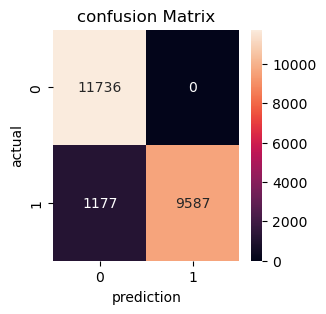

In [36]:
plt.figure(figsize=(3,3))

sns.heatmap(cm, annot=True, fmt='d')
plt.title('confusion Matrix')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [37]:
print(classification_report(Y_train, X_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     11736
           1       1.00      0.89      0.94     10764

    accuracy                           0.95     22500
   macro avg       0.95      0.95      0.95     22500
weighted avg       0.95      0.95      0.95     22500



In [40]:
predicted = model.predict(X_test)

In [46]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == Y_test).sum()
NewprediksiSalah = (predicted != Y_test).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(Y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
f1score = ((2*precision)*recall)/(precision+recall)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print("f1score: ", f1score*100,"%" )
print(classification_report(Y_test,predicted))

prediksi benar:  7075  data
prediksi salah:  425  data
Akurasi Algoritme:  94.33333333333334 %
TRUE NEGATIVE (TN): 3912
FALSE NEGATIVE (FN): 425
TRUE POSITIVE (TP): 3163
FALSE POSITIVE (FP): 0
PRECISION: 100.0 %
RECALL: 88.15496098104794 %
f1score:  93.70463635017035 100%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3912
           1       1.00      0.88      0.94      3588

    accuracy                           0.94      7500
   macro avg       0.95      0.94      0.94      7500
weighted avg       0.95      0.94      0.94      7500

